In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
# Data through 2017
run1 = RunManager('StatArbStrategy', 'run_0090', test_periods=5)
drop_params = [('holding_period', 5), ('holding_period', 7)]
run2 = RunManager('StatArbStrategy', 'run_0092', test_periods=5, drop_params=drop_params)

In [4]:
comb1 = CombinationSearch()
comb1.add_run(run1)
comb1.params['training_epochs'] = 10
comb1.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:43<00:00, 10.16s/it]


In [5]:
comb2 = CombinationSearch()
comb2.add_run(run2)
comb2.params['training_epochs'] = 10
comb2.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [02:03<00:00, 12.94s/it]


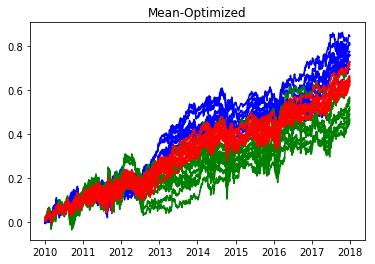

In [6]:
x1 = comb1.best_results_returns
x2 = comb2.best_results_returns
x3 = (x1 + x2) / 2.

plt.figure()
plt.plot(x1.cumsum(), 'b')
plt.plot(x2.cumsum(), 'g')
plt.plot(x3.cumsum(), 'r')
plt.title('Mean-Optimized')
plt.show()

In [7]:
stats1 = get_stats(x1.dropna())
stats2 = get_stats(x2.dropna())
stats3 = get_stats(x3.dropna())

In [8]:
print(stats1.loc['Sharpe'].mean())
print(stats2.loc['Sharpe'].mean())
print(stats3.loc['Sharpe'].mean())

1.00599
0.66071
1.03522


In [9]:
stats1

,0,1,2,3,4,5,6,7,8,9
Total,0.7758,0.8065,0.6953,0.6404,0.8461,0.7581,0.7272,0.7578,0.8130,0.7604
Mean,0.0004,0.0004,0.0003,0.0003,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004
Std,0.0062,0.0060,0.0060,0.0061,0.0060,0.0058,0.0059,0.0058,0.0058,0.0058
Skew,-0.0167,0.1005,0.0867,0.0674,0.0633,-0.0008,0.0206,0.0046,0.1240,0.1083
Kurt,2.4000,2.1300,2.2800,2.4400,3.1300,1.6000,3.0200,2.2000,2.4000,2.5900
Sharpe,0.9847,1.0581,0.9149,0.8273,1.1193,1.0274,0.9641,1.0233,1.1132,1.0276
Sortino,1.6802,1.8351,1.5835,1.4177,1.9455,1.7774,1.6451,1.7579,1.9596,1.7971
MinRet,-0.0338,-0.0288,-0.0316,-0.0338,-0.0345,-0.0275,-0.0311,-0.0281,-0.0322,-0.0280
WinP,0.5271,0.5325,0.5196,0.5276,0.5276,0.5310,0.5286,0.5360,0.5171,0.5236
DD%,-0.1233,-0.1142,-0.1322,-0.1670,-0.1199,-0.1005,-0.1104,-0.1173,-0.1418,-0.1130


In [10]:
print(stats1.loc['DD%'].mean())
print(stats2.loc['DD%'].mean())
print(stats3.loc['DD%'].mean())

-0.12396
-0.1405
-0.10985


In [11]:
print(stats1.loc['MinRet'].mean())
print(stats2.loc['MinRet'].mean())
print(stats3.loc['MinRet'].mean())

-0.03094
-0.03844
-0.02441


In [12]:
print(stats1.loc['VaR_5perc'].mean())
print(stats2.loc['VaR_5perc'].mean())
print(stats3.loc['VaR_5perc'].mean())

-0.00906
-0.01013
-0.00756


In [13]:
print(stats1.loc['DDDays'].mean())
print(stats2.loc['DDDays'].mean())
print(stats3.loc['DDDays'].mean())

315.6
269.3
179.6


In [14]:
df1 = rollup_returns(x1)
df2 = rollup_returns(x2)
df3 = rollup_returns(x3)

df1['yr'] = df1.sum(axis=1)
df2['yr'] = df2.sum(axis=1)
df3['yr'] = df3.sum(axis=1)

In [15]:
print(df1.yr.mean())
print(df2.yr.mean())
print(df3.yr.mean())

0.0969778191384
0.0818803774518
0.0894290982951


In [16]:
print(df1.yr.min())
print(df2.yr.min())
print(df3.yr.min())

0.0319274506976
0.0160961678222
0.0479895557008


In [17]:
df3

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.038471,0.014165,0.025719,0.035069,0.113424
2011,0.036744,0.002896,-0.038636,0.061541,0.062546
2012,0.035146,-0.035649,0.005927,0.072455,0.077879
2013,0.007776,0.045766,0.037035,-0.007056,0.083522
2014,0.054531,0.019246,-0.028308,0.002520,0.047990
2015,0.001311,0.045435,-0.028183,0.056222,0.074785
2016,0.057263,-0.001071,0.013248,-0.003399,0.066041
2017,0.039754,0.047697,0.061332,0.040464,0.189247


In [18]:
df2

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.011263,0.055953,-0.017724,0.082855,0.132347
2011,0.061709,-0.046077,-0.008462,0.057396,0.064566
2012,0.070975,-0.065555,-0.013080,0.023757,0.016096
2013,-0.017220,0.027584,0.028463,0.025128,0.063955
2014,0.076249,-0.007097,-0.037912,0.032813,0.064052
2015,0.022035,0.026630,-0.033712,0.070378,0.085331
2016,0.046463,0.031641,0.012474,-0.042012,0.048566
2017,0.036934,-0.032319,0.099551,0.075964,0.180131


In [19]:
df1

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.065679,-0.027622,0.069162,-0.012717,0.094502
2011,0.011780,0.051868,-0.068810,0.065686,0.060525
2012,-0.000683,-0.005742,0.024933,0.121154,0.139661
2013,0.032772,0.063948,0.045608,-0.039239,0.103089
2014,0.032813,0.045590,-0.018704,-0.027772,0.031927
2015,-0.019412,0.064239,-0.022654,0.042066,0.064239
2016,0.068063,-0.033784,0.014023,0.035214,0.083516
2017,0.042573,0.127713,0.023112,0.004964,0.198363
